In [1]:
import numpy as np
import pandas as pd

Clean Data

In [2]:
title=pd.read_csv('titles.csv')
dscpt=title['description']
dscpt.isnull()
len(title[title['description'].isnull()])
#The first step: find out null rows and delete

18

In [3]:
print('null id: ', len(title[title['id'].isnull()]))
print('null title: ', len(title[title['title'].isnull()]))
print('null type: ', len(title[title['type'].isnull()]))
print('null description: ', len(title[title['description'].isnull()]))
print('null release_year: ', len(title[title['release_year'].isnull()]))
print('null age_certification: ', len(title[title['age_certification'].isnull()]))
print('null runtime: ', len(title[title['runtime'].isnull()]))
print('null genres: ', len(title[title['genres'].isnull()]))
print('null production_contries: ', len(title[title['production_countries'].isnull()]))
print('null seasons: ', len(title[title['seasons'].isnull()]))

null id:  0
null title:  1
null type:  0
null description:  18
null release_year:  0
null age_certification:  2619
null runtime:  0
null genres:  0
null production_contries:  0
null seasons:  3744


In [4]:
title = title[title['description'].notnull()]
print('null description: ', len(title[title['title'].isnull()]))

null description:  0


Separate into two tables based on release year

In [5]:
before_covid=title[title['release_year']<=2020]
after_covid=title[title['release_year']>2020]

Separate into four tables based on type


In [6]:
before_covid_show=before_covid[before_covid['type']=='SHOW']
after_covid_show=after_covid[after_covid['type']=='SHOW']
before_covid_movie=before_covid[before_covid['type']=='MOVIE']
after_covid_movie=after_covid[after_covid['type']=='MOVIE']

In [7]:
#reset the indices
before_covid_movie = before_covid_movie.reset_index()
before_covid_show = before_covid_show.reset_index()
after_covid_movie = after_covid_movie.reset_index()
after_covid_show = after_covid_show.reset_index()
print('before covid movie', len(before_covid_movie))
print('before covid show', len(before_covid_show))
print('after covid movie', len(after_covid_movie))
print('after covid show', len(after_covid_show))

before covid movie 3063
before covid show 1612
after covid movie 672
after covid show 485


Tokenizing

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [10]:
#see the effect of word_tokenize
from nltk.tokenize import word_tokenize
text = title['description'][0]
print(word_tokenize(text))

['This', 'collection', 'includes', '12', 'World', 'War', 'II-era', 'propaganda', 'films', '—', 'many', 'of', 'which', 'are', 'graphic', 'and', 'offensive', '—', 'discussed', 'in', 'the', 'docuseries', '``', 'Five', 'Came', 'Back', '.', "''"]


In [11]:
#word tokenize, regards puntuations as words as well. if a word appears lily's, 

for df in [before_covid_show, after_covid_show, before_covid_movie, after_covid_movie]:
  df['word_tokenize'] = df.apply(lambda df: nltk.word_tokenize(df['description'].lower()), axis=1)
print(before_covid_show['word_tokenize'])
before_covid_show.head()

0       [this, collection, includes, 12, world, war, i...
1       [a, british, sketch, comedy, series, with, the...
2       [monty, python, 's, fliegender, zirkus, consis...
3       [a, stand-up, comedian, and, his, three, offbe...
4       [michael, long, ,, an, undercover, police, off...
                              ...                        
1607    [``, the, good, bandit, '', introduces, the, n...
1608    [the, experiences, of, the, first, group, of, ...
1609    [``, miss, culinary, '', reveals, the, brillia...
1610    [from, decorating, his, home, to, devouring, s...
1611    [with, help, from, celebrity, guests, and, a, ...
Name: word_tokenize, Length: 1612, dtype: object


,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_tokenize
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,"[this, collection, includes, 12, world, war, i..."
1,5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[a, british, sketch, comedy, series, with, the..."
2,26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000,"[monty, python, 's, fliegender, zirkus, consis..."
3,35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301,"[a, stand-up, comedian, and, his, three, offbe..."
4,44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500,"[michael, long, ,, an, undercover, police, off..."


In [12]:
#regex tokenize, extract words without separating 
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+\'*\w*')
before_covid_show['description'].apply(regexp.tokenize)

0       [This, collection, includes, 12, World, War, I...
1       [A, British, sketch, comedy, series, with, the...
2       [Monty, Python's, Fliegender, Zirkus, consiste...
3       [A, stand, up, comedian, and, his, three, offb...
4       [Michael, Long, an, undercover, police, office...
                              ...                        
1607    [The, Good, Bandit, introduces, the, new, narc...
1608    [The, experiences, of, the, first, group, of, ...
1609    [Miss, Culinary, reveals, the, brilliance, of,...
1610    [From, decorating, his, home, to, devouring, s...
1611    [With, help, from, celebrity, guests, and, a, ...
Name: description, Length: 1612, dtype: object

In [13]:
#import stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#drop stopwords

for df in [before_covid_show, after_covid_show, before_covid_movie, after_covid_movie]:
  df['word_tokenize_nosw'] = df['word_tokenize'].apply(lambda x: [item for item in x if item not in stop])

print(before_covid_movie['word_tokenize_nosw'])
before_covid_movie.head()

0       [mentally, unstable, vietnam, war, veteran, wo...
1       [intent, seeing, cahulawassee, river, 's, turn...
2       [king, arthur, ,, accompanied, squire, ,, recr...
3       [12, american, military, prisoners, world, war...
4       [brian, cohen, average, young, jewish, man, ,,...
                              ...                        
3058    [partner, crime, goes, missing, ,, small-time,...
3059    [provocative, personal, documentary, ,, direct...
3060    [santa, needs, serious, help, prepping, presen...
3061    [high, end, yaariyaan, tale, 3, friends, ranji...
3062    [italian, comedian, edoardo, ferrario, riffs, ...
Name: word_tokenize_nosw, Length: 3063, dtype: object


,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_tokenize,word_tokenize_nosw
0,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"[a, mentally, unstable, vietnam, war, veteran,...","[mentally, unstable, vietnam, war, veteran, wo..."
1,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"[intent, on, seeing, the, cahulawassee, river,...","[intent, seeing, cahulawassee, river, 's, turn..."
2,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"[king, arthur, ,, accompanied, by, his, squire...","[king, arthur, ,, accompanied, squire, ,, recr..."
3,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"[12, american, military, prisoners, in, world,...","[12, american, military, prisoners, world, war..."
4,6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800,"[brian, cohen, is, an, average, young, jewish,...","[brian, cohen, average, young, jewish, man, ,,..."


In [51]:
#put all the outcomes of word tokenize without stop words in a single list
a1 = []
b1 = []
c1 = []
d1 = []
for i in range(len(before_covid_movie)):
  a1 += before_covid_movie['word_tokenize_nosw'][i]
for i in range(len(before_covid_show)):
  b1 += before_covid_show['word_tokenize_nosw'][i]
for i in range(len(after_covid_movie)):
  c1 += after_covid_movie['word_tokenize_nosw'][i]
for i in range(len(after_covid_show)):
  d1 += after_covid_show['word_tokenize_nosw'][i]

Show Word Distribution

In [55]:
print('before covid movie:')
fd_bcm = nltk.FreqDist(a1)
print(fd_bcm)
fd_bcm.most_common(10)
fd_bcm.tabulate(10)

before covid movie:
<FreqDist with 16673 samples and 88285 outcomes>
     ,      .     's   life    one family   love    new      ’  young 
  6785   5571   1016    495    354    347    331    330    328    321 


In [56]:
print('before covid show:')
fd_bcs = nltk.FreqDist(b1)
print(fd_bcs)
fd_bcs.most_common(10)
fd_bcs.tabulate(10)

before covid show:
<FreqDist with 10677 samples and 44115 outcomes>
     ,      .     's series  world   life    new family    one   love 
  3280   2784    489    258    220    213    186    160    147    144 


In [57]:
print('after covid movie:')
fd_acm = nltk.FreqDist(c1)
print(fd_acm)
fd_acm.most_common(10)
fd_acm.tabulate(10)

after covid movie:
<FreqDist with 5693 samples and 16089 outcomes>
     ,      .     's   life      ’ family   love  young    one    two 
  1134   1052    182     98     90     76     76     61     52     50 


In [58]:
print('after covid show:')
fd_acs = nltk.FreqDist(d1)
print(fd_acs)
fd_acs.most_common(10)
fd_acs.tabulate(10)

after covid show:
<FreqDist with 4127 samples and 10212 outcomes>
     ,      .     's  world   life series    two    new   love      — 
   696    675    115     64     61     56     51     50     41     39 


Generate Word Cloud

Before Covid Movie:


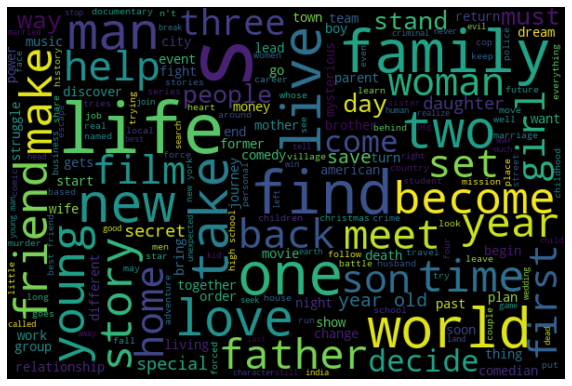

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

A1 = ', '.join(a1)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(A1)

print('Before Covid Movie:')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Before Covid Show:


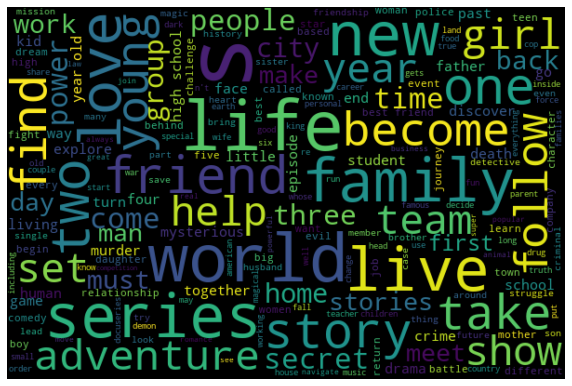

In [62]:
B1 = ', '.join(b1)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(B1)

print('Before Covid Show:')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

After Covid Movie:


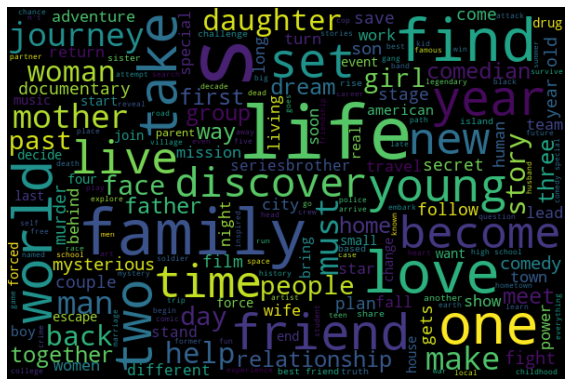

In [63]:
C1 = ', '.join(c1)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(C1)

print('After Covid Movie:')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

After Covid Show:


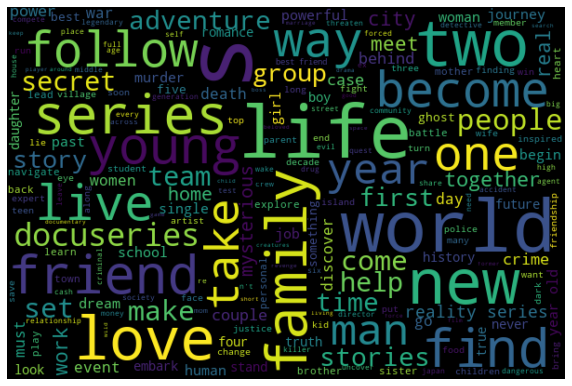

In [64]:
D1 = ', '.join(d1)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(D1)

print('After Covid Show:')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [16]:
#sentence tokenize, split by period only

for df in [before_covid_show, after_covid_show, before_covid_movie, after_covid_movie]:
  df['sent_tokenize'] = df.apply(lambda df: nltk.sent_tokenize(df['description'].lower()), axis=1)
print(before_covid_show['sent_tokenize'])
before_covid_show.head()

0       [this collection includes 12 world war ii-era ...
1       [a british sketch comedy series with the shows...
2       [monty python's fliegender zirkus consisted of...
3       [a stand-up comedian and his three offbeat fri...
4       [michael long, an undercover police officer, i...
                              ...                        
1607    ["the good bandit" introduces the new narco-co...
1608    [the experiences of the first group of kuwaiti...
1609    ["miss culinary" reveals the brilliance of a y...
1610    [from decorating his home to devouring sweet, ...
1611    [with help from celebrity guests and a glam sq...
Name: sent_tokenize, Length: 1612, dtype: object


,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_tokenize,word_tokenize_nosw,sent_tokenize
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,"[this, collection, includes, 12, world, war, i...","[collection, includes, 12, world, war, ii-era,...",[this collection includes 12 world war ii-era ...
1,5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[a, british, sketch, comedy, series, with, the...","[british, sketch, comedy, series, shows, compo...",[a british sketch comedy series with the shows...
2,26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000,"[monty, python, 's, fliegender, zirkus, consis...","[monty, python, 's, fliegender, zirkus, consis...",[monty python's fliegender zirkus consisted of...
3,35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301,"[a, stand-up, comedian, and, his, three, offbe...","[stand-up, comedian, three, offbeat, friends, ...",[a stand-up comedian and his three offbeat fri...
4,44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500,"[michael, long, ,, an, undercover, police, off...","[michael, long, ,, undercover, police, officer...","[michael long, an undercover police officer, i..."


In [17]:
#split by comma, period and semicolon

import re

before_covid_show_new = before_covid_show['description'].copy()
after_covid_show_new = after_covid_show['description'].copy()
before_covid_movie_new = before_covid_movie['description'].copy()
after_covid_movie_new = after_covid_movie['description'].copy()

before_covid_show_senlist = []
for i in range(len(before_covid_show)):
  a=re.split('[;,.]', before_covid_show_new.reset_index().drop(['index'],axis=1)['description'][i])
  before_covid_show_senlist.append(a[0:-1])


after_covid_show_senlist = []
for i in range(len(after_covid_show)):
  b=re.split('[;,.]',after_covid_show_new.reset_index().drop(['index'],axis=1)['description'][i])
  after_covid_show_senlist.append(b[0:-1])


before_covid_movie_senlist= []
for i in range(len(before_covid_movie)):
  c=re.split('[;,.]',before_covid_movie_new.reset_index().drop(['index'],axis=1)['description'][i])
  before_covid_movie_senlist.append(c[0:-1])


after_covid_movie_senlist= []
for i in range(len(after_covid_movie)):
  d=re.split('[;,.]',after_covid_movie_new.reset_index().drop(['index'],axis=1)['description'][i])
  after_covid_movie_senlist.append(d[0:-1])


In [18]:
#after_covid_movie = after_covid_movie.reset_index()
b = after_covid_movie['description'][1]

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(b)

{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3612}

Get polarity score from descriptions

In [38]:
#for df in [before_covid_show, after_covid_show, before_covid_movie, after_covid_movie]:
#before_covid_show = before_covid_show.reset_index()
bcs_polarity = []
for i in range(len(before_covid_show)):
  b = before_covid_show['description'][i].lower()
  c = analyzer.polarity_scores(b)
  bcs_polarity.append(c)
  #print(analyzer.polarity_scores(b))
print(len(bcs_polarity))
bcs_polarity[:3]
#ok

1612


[{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.836},
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6808},
 {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.3612}]

In [39]:
bcm_polarity = []
for i in range(len(before_covid_movie)):
  b = before_covid_movie['description'][i].lower()
  c = analyzer.polarity_scores(b)
  bcm_polarity.append(c)
  #print(analyzer.polarity_scores(b))
print(len(bcm_polarity))
bcm_polarity[:3]
#ok

3063


[{'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.8834},
 {'neg': 0.083, 'neu': 0.726, 'pos': 0.19, 'compound': 0.4526},
 {'neg': 0.051, 'neu': 0.859, 'pos': 0.091, 'compound': 0.2144}]

In [40]:
acs_polarity = []
for i in range(len(after_covid_show)):
  b = after_covid_show['description'][i].lower()
  c = analyzer.polarity_scores(b)
  acs_polarity.append(c)
  #print(analyzer.polarity_scores(b))
print(len(acs_polarity))
acs_polarity[:3]
#ok

485


[{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.5719},
 {'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.8316},
 {'neg': 0.223, 'neu': 0.658, 'pos': 0.119, 'compound': -0.5106}]

In [41]:
acm_polarity = []
for i in range(len(after_covid_movie)):
  b = after_covid_movie['description'][i].lower()
  c = analyzer.polarity_scores(b)
  acm_polarity.append(c)
  #print(analyzer.polarity_scores(b))
print(len(acm_polarity))
acm_polarity[1]
#ok

672


{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3612}

In [42]:
def test(d):
    if d > 0:
        return 1
    elif d == 0:
        return 0
    else:
        return -1

In [43]:
bcs= pd.DataFrame(bcs_polarity)
acs= pd.DataFrame(acs_polarity)
bcm= pd.DataFrame(bcm_polarity)
acm= pd.DataFrame(acm_polarity)
before_covid_movie['polarity'] = bcm['compound']
before_covid_movie['sentiment']=bcm['compound'].map(test)
before_covid_show['polarity']= bcs['compound']
before_covid_show['sentiment']=bcs['compound'].map(test)
after_covid_movie['polarity'] = acm['compound']
after_covid_movie['sentiment']=acm['compound'].map(test)
after_covid_show['polarity']= acs['compound']
after_covid_show['sentiment']=acs['compound'].map(test)

In [44]:
#count fraction of positive, negative and neutral
print('Before Covid Movie: \npositive:{}%, \nnegative:{}%, \nneutral: {}%'.format(len(before_covid_movie[before_covid_movie['sentiment'] == 1])*100/len(before_covid_movie),
                                            len(before_covid_movie[before_covid_movie['sentiment'] == -1])*100/len(before_covid_movie), 
                                            len(before_covid_movie[before_covid_movie['sentiment'] == 0])*100/len(before_covid_movie)))
print('Before Covid Show: \npositive:{}%, \nnegative:{}%, \nneutral: {}%'.format(len(before_covid_show[before_covid_show['sentiment'] == 1])*100/len(before_covid_show),
                                            len(before_covid_show[before_covid_show['sentiment'] == -1])*100/len(before_covid_show), 
                                            len(before_covid_show[before_covid_show['sentiment'] == 0])*100/len(before_covid_show)))
print('After Covid Movie: \npositive:{}%, \nnegative:{}%, \nneutral: {}%'.format(len(after_covid_movie[after_covid_movie['sentiment'] == 1])*100/len(after_covid_movie),
                                            len(after_covid_movie[after_covid_movie['sentiment'] == -1])*100/len(after_covid_movie), 
                                            len(after_covid_movie[after_covid_movie['sentiment'] == 0])*100/len(after_covid_movie)))
print('After Covid Show: \npositive:{}%, \nnegative:{}%, \nneutral: {}%'.format(len(after_covid_show[after_covid_show['sentiment'] == 1])*100/len(after_covid_show),
                                            len(after_covid_show[after_covid_show['sentiment'] == -1])*100/len(after_covid_show), 
                                            len(after_covid_show[after_covid_show['sentiment'] == 0])*100/len(after_covid_show)))

Before Covid Movie: 
positive:51.256937642833826%, 
negative:41.65850473392099%, 
neutral: 7.084557623245185%
Before Covid Show: 
positive:53.59801488833747%, 
negative:37.655086848635236%, 
neutral: 8.746898263027296%
After Covid Movie: 
positive:52.083333333333336%, 
negative:40.92261904761905%, 
neutral: 6.994047619047619%
After Covid Show: 
positive:54.63917525773196%, 
negative:37.31958762886598%, 
neutral: 8.041237113402062%


Plot Pie Charts for Polarity Percentages

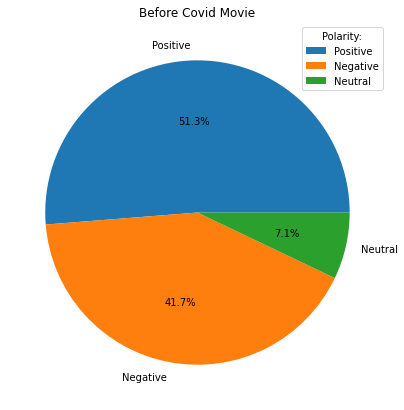

In [67]:
y = np.array([len(before_covid_movie[before_covid_movie['sentiment'] == 1])/len(before_covid_movie),
        len(before_covid_movie[before_covid_movie['sentiment'] == -1])/len(before_covid_movie), 
        len(before_covid_movie[before_covid_movie['sentiment'] == 0])/len(before_covid_movie)
        ])
mylabels = ["Positive", "Negative", "Neutral"]
plt.figure(figsize=(10, 7))
plt.title('Before Covid Movie')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(title = "Polarity:")
plt.show() 

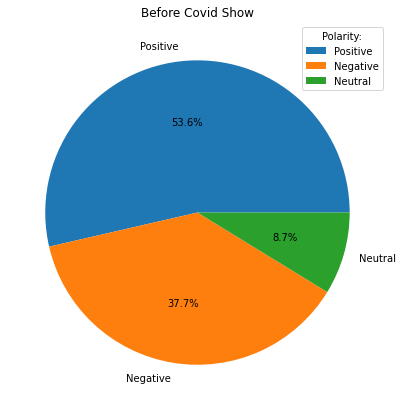

In [68]:
y = np.array([len(before_covid_show[before_covid_show['sentiment'] == 1])/len(before_covid_show),
        len(before_covid_show[before_covid_show['sentiment'] == -1])/len(before_covid_show), 
        len(before_covid_show[before_covid_show['sentiment'] == 0])/len(before_covid_show)
        ])
mylabels = ["Positive", "Negative", "Neutral"]
plt.figure(figsize=(10, 7))
plt.title('Before Covid Show')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(title = "Polarity:")
plt.show()

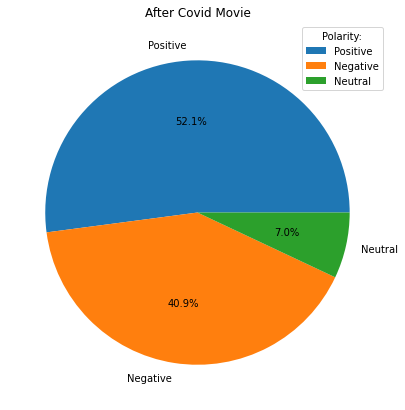

In [69]:
y = np.array([len(after_covid_movie[after_covid_movie['sentiment'] == 1])/len(after_covid_movie),
        len(after_covid_movie[after_covid_movie['sentiment'] == -1])/len(after_covid_movie), 
        len(after_covid_movie[after_covid_movie['sentiment'] == 0])/len(after_covid_movie)
        ])
mylabels = ["Positive", "Negative", "Neutral"]
plt.figure(figsize=(10, 7))
plt.title('After Covid Movie')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(title = "Polarity:")
plt.show() 

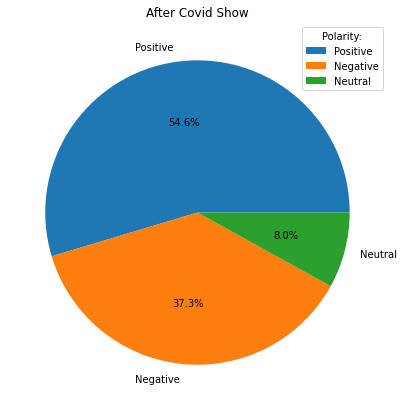

In [70]:
y = np.array([len(after_covid_show[after_covid_show['sentiment'] == 1])/len(after_covid_show),
        len(after_covid_show[after_covid_show['sentiment'] == -1])/len(after_covid_show), 
        len(after_covid_show[after_covid_show['sentiment'] == 0])/len(after_covid_show)
        ])
mylabels = ["Positive", "Negative", "Neutral"]
plt.figure(figsize=(10, 7))
plt.title('After Covid Show')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(title = "Polarity:")
plt.show() 

1.clean data (delete null rows)✔
2.separate into two tables✔
3.description:split string method:**word_tokenize()**✔
4.remove stop_word (stop_word dictionnary)✔
5.generate a score for each description and then categorize into three sets:positive negaetive neutral